In [185]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [186]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/property_data_clustering_clean.csv"
df = pd.read_csv(url)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [187]:
# rename the column
df = df.rename(columns={"Luas Tanah (m2)": "Luas Tanah", "Luas Bangunan (m2)": "Luas Bangunan", "Harga Penawaran (dari Owner)": "Harga Penawaran", "Lebar Jalan Depan Rumah (ROW)": "Lebar Jalan Depan Rumah"})
df.head()

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [188]:
# describe data
df.describe()

,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
count,308.000000,308.000000,308.000000,308.000000,308.000000,3.080000e+02
mean,226.951299,266.688312,4.275974,3.337662,1.840909,5.014301e+09
std,201.821447,213.161697,1.643804,1.627215,0.507932,8.311434e+09
min,14.000000,14.000000,1.000000,1.000000,1.000000,1.600000e+08
25%,96.000000,120.000000,3.000000,2.000000,2.000000,1.400000e+09
50%,162.500000,200.000000,4.000000,3.000000,2.000000,2.699500e+09
75%,283.000000,328.750000,5.000000,4.000000,2.000000,4.891667e+09
max,1561.000000,1200.000000,13.000000,13.000000,4.000000,9.900000e+10


In [189]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Area Category            308 non-null    object
 1   Nama Daerah              308 non-null    object
 2   Luas Tanah               308 non-null    int64 
 3   Luas Bangunan            308 non-null    int64 
 4   Jumlah Kamar             308 non-null    int64 
 5   Jumlah Kamar Mandi       308 non-null    int64 
 6   Tingkat/Lantai           308 non-null    int64 
 7   Harga Penawaran          308 non-null    int64 
 8   Terjual/Belum            308 non-null    object
 9   Arah Hadap Rumah         308 non-null    object
 10  Posisi Rumah             308 non-null    object
 11  Lebar Jalan Depan Rumah  308 non-null    object
dtypes: int64(6), object(6)
memory usage: 29.0+ KB


In [190]:
# show unique values from column

unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

# Terdapat nama daerah yang sama seperti Citraland dan Citraland. Wonokromo dan wonokromo

{'Area Category': array(['Standard', 'Below Standard', 'Sangat Premium', 'Premium'],
       dtype=object),
 'Nama Daerah': array(['Citraland', 'Setro Baru Utara', 'Kenjeran', 'Gubeng', 'Sawahan',
        'Mulyorejo', 'Tegalsari', 'Tambaksari', 'Kalilom Lor Timur',
        'Jelidro Manukan', 'Kalilom', 'Bulak Cumpat barat', 'Tambak Wedi',
        'Lebak Jaya', 'Simo Gunung Kramat Timur', 'Medokan Ayu',
        'Lebak Rejo', 'Medokan Sawah', 'Klampis Ngasem',
        'Medokan Sawah Timur', 'Citraland Golf Avenue', 'Wisata Semanggi',
        'Kedung Klinter', 'Gading Indah Regency', 'Gunung Anyar Mas',
        'Kutisari Utara', 'Mulyosari Tengah', 'Kapas Madya',
        'Bratang Gede', 'Citraland Utara', 'Lebak Jaya Utara',
        'Mulyosari Timur', 'Pakuwon City', 'Pakuwon city',
        'Pakuwon City Florence', 'Pantai Mentari', 'Royal Residence',
        'Villa Kalijudan Indah', 'Sutorejo Timur', 'Springville Residence',
        'Sukomanunggal', 'Surabaya Pusat', 'Su', 'Mulyosari',
  

In [191]:
# Ubah ke string dulu (menghindari error .str accessor)
df['Nama Daerah'] = df['Nama Daerah'].astype(str)

# Normalisasi: hapus spasi di awal/akhir, ubah kapitalisasi
df['Nama Daerah'] = (
    df['Nama Daerah']
    .str.strip()
    .str.lower()
    .str.title()
)

# Hapus double spasi di tengah (opsional)
df['Nama Daerah'] = df['Nama Daerah'].str.replace(r'\s+', ' ', regex=True)

# Cek hasil
print(df['Nama Daerah'].value_counts().sort_index())

Nama Daerah
Anjasmoro                       1
Araya                           2
Asemrowo                        1
Babatan                         1
Babatan Pantai                  1
Baratajaya                      1
Bendul Merisi                   1
Bratang Gede                    1
Bubutan                         1
Bulak Cumpat Barat              1
Ciliwung                        1
Citraland                      35
Citraland Golf Avenue           1
Citraland Utara                 1
Darmahusada                     1
Darmo                           3
Darmo Permai                    2
Diponegoro                      1
Dukuh Pakis                     1
Dukuh Sutorejo                  1
Gading                          1
Gading Indah Regency            1
Galaxy Bumi Permai              1
Gayungan                        6
Gayungsari                      1
Graha                           1
Graha Famili                    1
Graha Family                    6
Greenlake Wonorejo              1
Gu

## EDA

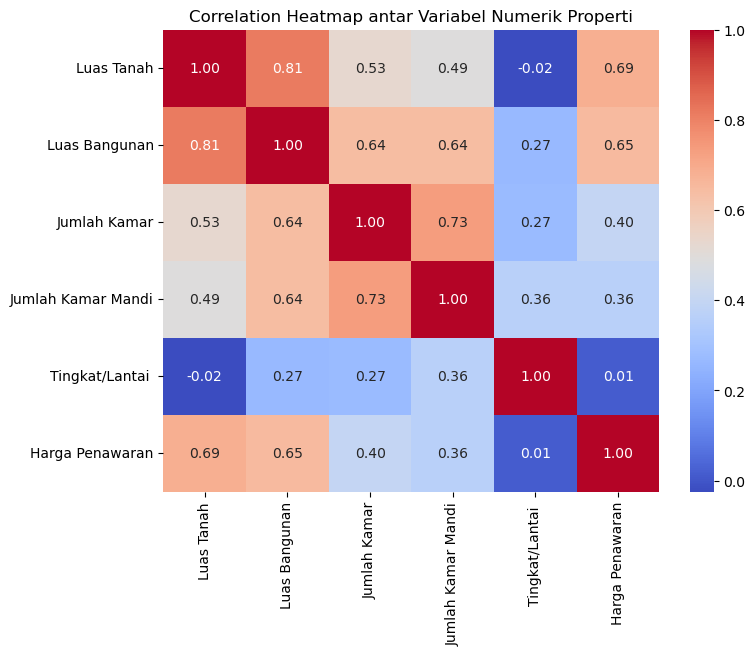

In [192]:
num_cols = ['Luas Tanah', 'Luas Bangunan' , 'Jumlah Kamar', 
            'Jumlah Kamar Mandi', 'Tingkat/Lantai ', 'Harga Penawaran']

plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap antar Variabel Numerik Properti')
plt.show()

Heatmap menunjukan korelasi antar numerik variabel. Luas tanah dan luas bangunan menunjukan korelasi yang kuat. Harga penawaran juga mneunjukan korelasi kuat terhadap luas tanah dan bangunan. Berarti semakin luas tanah dan bangunan semakin mahal penawaran harga nya. 

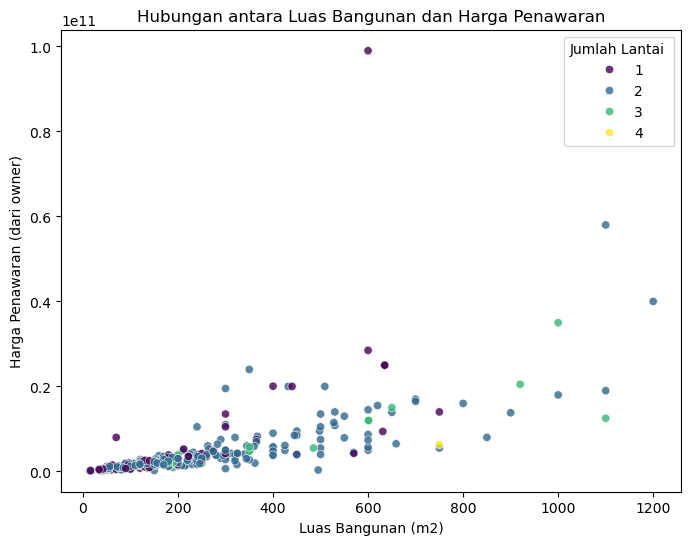

In [193]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, 
                x='Luas Bangunan', 
                y='Harga Penawaran', 
                hue='Tingkat/Lantai ', 
                palette='viridis', 
                alpha=0.8)

plt.title('Hubungan antara Luas Bangunan dan Harga Penawaran')
plt.xlabel('Luas Bangunan (m2)')
plt.ylabel('Harga Penawaran (dari owner)')
plt.legend(title='Jumlah Lantai ')
plt.show()

semakin luas bangunan nya maka harga penawaran dari owner juga semakin tinggi. Semakin luas bangunan nya, cenderung lantai nya juga semakin banyak, namun tidak terlalu berhubungan

## Data Transformation

In [194]:
cat_cols = ['Area Category', 'Nama Daerah', 'Terjual/Belum',
            'Arah Hadap Rumah', 'Posisi Rumah', 'Lebar Jalan Depan Rumah']

# Buat dictionary untuk menyimpan encoder tiap kolom
encoders = {}

# Loop untuk encoding tiap kolom kategorikal
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le  # simpan encoder ke dictionary

# Cek hasil
df.head()

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah
0,3,11,240,300,4,3,2,3500000000,0,3,2,0
1,0,96,30,60,2,1,2,287799000,0,3,2,1
2,3,47,170,170,5,4,2,2699999999,0,1,0,0
3,2,47,187,250,5,5,2,3100000000,0,3,2,0
4,1,47,350,600,5,5,2,5000000000,0,0,2,0


In [195]:
# INI DIGABUNGIN YG SAMA"
with open("label_encoder_mapping.txt", "w", encoding="utf-8") as f:
    for col, le in encoders.items():
        f.write(f"\nMapping kolom: {col}\n")
        for i, cls in enumerate(le.classes_):
            f.write(f"{i} → {cls}\n")

print("✅ Mapping disimpan ke 'label_encoder_mapping.txt'")


✅ Mapping disimpan ke 'label_encoder_mapping.txt'



Mapping kolom: Area Category
0 → Below Standard
1 → Premium
2 → Sangat Premium
3 → Standard

Mapping kolom: Nama Daerah
0 → Anjasmoro
1 → Araya
2 → Asemrowo
3 → Babatan
4 → Babatan Pantai
5 → Baratajaya
6 → Bendul Merisi
7 → Bratang Gede
8 → Bubutan
9 → Bulak Cumpat Barat
10 → Ciliwung
11 → Citraland
12 → Citraland Golf Avenue
13 → Citraland Utara
14 → Darmahusada
15 → Darmo
16 → Darmo Permai
17 → Diponegoro
18 → Dukuh Pakis
19 → Dukuh Sutorejo
20 → Gading
21 → Gading Indah Regency
22 → Galaxy Bumi Permai
23 → Gayungan
24 → Gayungsari
25 → Graha
26 → Graha Famili
27 → Graha Family
28 → Greenlake Wonorejo
29 → Gubeng
30 → Gunung Anyar Mas
31 → Gununganyar
32 → Gununganyar Tambak
33 → Jambangan
34 → Jambangan Kebon Agung
35 → Jelidro Manukan
36 → Jimerto
37 → Kalilom
38 → Kalilom Lor Timur
39 → Kapas Madya
40 → Karah
41 → Karang Asem
42 → Kartini
43 → Kebonsari
44 → Kedung Klinter
45 → Kemayoran
46 → Kendangsari
47 → Kenjeran
48 → Kenjeran Indah
49 → Kertajaya
50 → Kertajaya Indah Timur
51 → Ketintang
52 → Klampis Ngasem
53 → Krukah Selatan
54 → Kutisari
55 → Kutisari Utara
56 → Lakarsantri
57 → Lebak Jaya
58 → Lebak Jaya Utara
59 → Lebak Rejo
60 → Lidah Kulon
61 → Lontar
62 → Manyar
63 → Manyar Garden Regency
64 → Manyar Kertoajo
65 → Manyar Tirtoasri
66 → Mayjend Sungkono
67 → Medokan Ayu
68 → Medokan Sawah
69 → Medokan Sawah Timur
70 → Merr
71 → Mulyorejo
72 → Mulyosari
73 → Mulyosari Tengah
74 → Mulyosari Timur
75 → Mulyosari Utara
76 → Ngagel
77 → Nirwana Ekseskutif
78 → Pakal
79 → Pakis
80 → Pakuwon City
81 → Pakuwon City Florence
82 → Pakuwon Indah
83 → Pantai Mentari
84 → Petemon
85 → Pondok Benowo Indah
86 → Prapen
87 → Putat Jaya
88 → Raya Arjuno
89 → Raya Margorejo
90 → Royal Residence
91 → Rungkut
92 → Rungkut Private Residential
93 → Sakura Regency Ketintang
94 → Sawahan
95 → Semolowaru
96 → Setro Baru Utara
97 → Simo Gunung Kramat Timur
98 → Simokerto
99 → Springville Residence
100 → Su
101 → Sukolilo
102 → Sukomanunggal
103 → Surabaya Pusat
104 → Sutorejo
105 → Sutorejo Timur
106 → Sutorejo Utara
107 → Tambak Wedi
108 → Tambaksari
109 → Tandes
110 → Tegalsari
111 → Tenggilis
112 → Tenggilis Mejoyo
113 → Teuku Umar
114 → Villa Kalijudan Indah
115 → Wisata Bukit Mas
116 → Wisata Semanggi
117 → Wisma Mukti
118 → Wiyung
119 → Wonocolo
120 → Wonokromo

Mapping kolom: Terjual/Belum
0 → Belum

Mapping kolom: Arah Hadap Rumah
0 → Barat
1 → Selatan
2 → Timur
3 → Utara

Mapping kolom: Posisi Rumah
0 → Cul De Sac/Ujung Gang Buntu
1 → Kantong Belakang/Ngantong
2 → Standard
3 → Tikungan/Hook
4 → Tusuk Sate

Mapping kolom: Lebar Jalan Depan Rumah
0 → 1-2 Mobil
1 → < 1 Mobil
2 → > 2 Mobil


In [196]:
# show unique values from column

unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Area Category': array([3, 0, 2, 1]),
 'Nama Daerah': array([ 11,  96,  47,  29,  94,  71, 110, 108,  38,  35,  37,   9, 107,
         57,  97,  67,  59,  68,  52,  69,  12, 116,  44,  21,  30,  55,
         73,  39,   7,  13,  58,  74,  80,  81,  83,  90, 114, 105,  99,
        102, 103, 100,  72,  53,  75,  85,  48, 111, 117, 120,  93,  87,
         65,   4,  77,   6,  28, 106,  92,  24, 118,  41,  63,  62,  64,
          1,  27,  36,  22,  50,  49,   0,  26,  34,  76, 109, 104,  95,
         91,  54,  60,  31,  82,  16, 115,  43, 101,  46,  51, 119,  89,
         84,  25,  66,  88,  17,  19,  56,  61,  14,  23,  20,  10,   8,
         15,  33,  79,  42,  45,  40,  98,   3,   5,  70,  86,  32,  78,
          2, 112,  18, 113]),
 'Luas Tanah': array([ 240,   30,  170,  187,  350,  450,   96,   85,   72,   50,  100,
          90,  104,   84,  158,  144,  163,  150,  140,  204,  200,  180,
         420,  312,  264,  297,  352,  343,  525,  522,  600,   14,   42,
          21,   16,   1

In [197]:
df.head()

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah
0,3,11,240,300,4,3,2,3500000000,0,3,2,0
1,0,96,30,60,2,1,2,287799000,0,3,2,1
2,3,47,170,170,5,4,2,2699999999,0,1,0,0
3,2,47,187,250,5,5,2,3100000000,0,3,2,0
4,1,47,350,600,5,5,2,5000000000,0,0,2,0


In [198]:
df.columns.tolist()

['Area Category',
 'Nama Daerah',
 'Luas Tanah',
 'Luas Bangunan',
 'Jumlah Kamar',
 'Jumlah Kamar Mandi',
 'Tingkat/Lantai ',
 'Harga Penawaran',
 'Terjual/Belum',
 'Arah Hadap Rumah',
 'Posisi Rumah',
 'Lebar Jalan Depan Rumah']

In [199]:
# Pisahkan kolom numerik dan kategorikal
num_cols = ['Luas Tanah', 'Luas Bangunan', 'Jumlah Kamar',
'Jumlah Kamar Mandi', 'Tingkat/Lantai ', 'Harga Penawaran']
cat_cols = [col for col in df.columns if col not in num_cols]

# Scaling hanya kolom numerik
sc = StandardScaler()
df_num_scaled = pd.DataFrame(sc.fit_transform(df[num_cols]), 
                             columns=num_cols,
                             index=df.index)

# Gabungkan kolom numerik yang sudah di-scale dengan kolom kategorikal
df_scaled = pd.concat([df_num_scaled, df[cat_cols]], axis=1)

# Cek hasil
df_scaled.head()


,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Area Category,Nama Daerah,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah
0,0.064760,0.156529,-0.168161,-0.207847,0.313723,-0.182491,3,11,0,3,2,0
1,-0.977457,-0.971209,-1.386831,-1.438941,0.313723,-0.569600,0,96,0,3,2,1
2,-0.282646,-0.454330,0.441174,0.407700,0.313723,-0.278901,3,47,0,1,0,0
3,-0.198276,-0.078417,0.441174,1.023247,0.313723,-0.230696,2,47,0,3,2,0
4,0.610683,1.566201,0.441174,1.023247,0.313723,-0.001723,1,47,0,0,2,0


In [200]:
# get stastical information on the new dataset
df_scaled.describe()

,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Area Category,Nama Daerah,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah
count,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,308.000000,308.00000,308.0,308.000000,308.000000,308.000000
mean,2.306957e-17,8.651089e-17,-1.153478e-16,2.883696e-17,1.672544e-16,-2.451142e-17,1.876623,59.50000,0.0,2.152597,2.071429,0.788961
std,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,1.120307,35.49111,0.0,1.011059,0.380419,0.957199
min,-1.056864e+00,-1.187359e+00,-1.996166e+00,-1.438941e+00,-1.658248e+00,-5.850015e-01,0.000000,0.00000,0.0,0.000000,0.000000,0.000000
25%,-6.499032e-01,-6.892750e-01,-7.774956e-01,-8.233942e-01,3.137225e-01,-4.355666e-01,1.000000,28.75000,0.0,1.000000,2.000000,0.000000
50%,-3.198678e-01,-3.133623e-01,-1.681606e-01,-2.078471e-01,3.137225e-01,-2.789613e-01,2.000000,62.00000,0.0,3.000000,2.000000,0.000000
75%,2.781662e-01,2.916222e-01,4.411744e-01,4.077000e-01,3.137225e-01,-1.477895e-02,3.000000,90.00000,0.0,3.000000,2.000000,2.000000
max,6.620801e+00,4.385546e+00,5.315854e+00,5.947624e+00,4.257663e+00,1.132640e+01,3.000000,120.00000,0.0,3.000000,4.000000,2.000000


## Silhouette Score

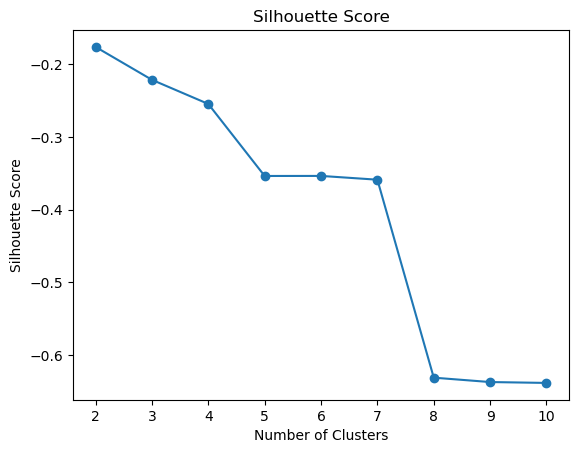

In [201]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

## Comparing Silhouette Score to get best combination of linkage and metric

Skipping Ward linkage with Manhattan metric (not supported).


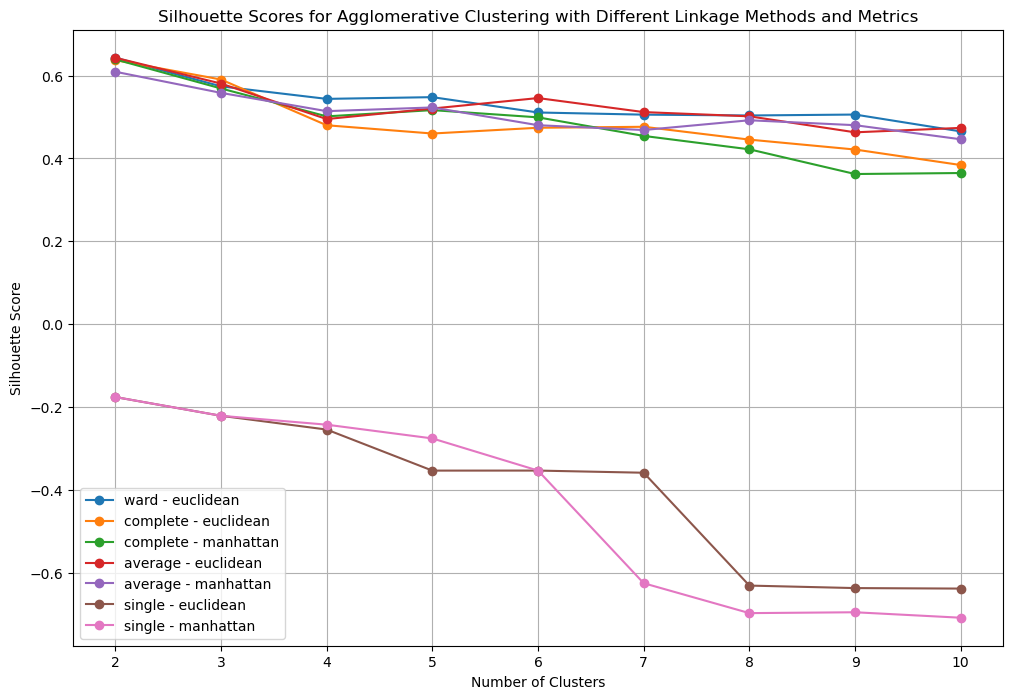

Best Silhouette Score: 0.6432103582061204
Optimal Number of Clusters: 2
Optimal Linkage Method: ward
Optimal Metric: euclidean


In [202]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_scaled)
            silhouette_avg = silhouette_score(df_scaled, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

# klo ward pasti pke euclidean

## Dendogram Visualization

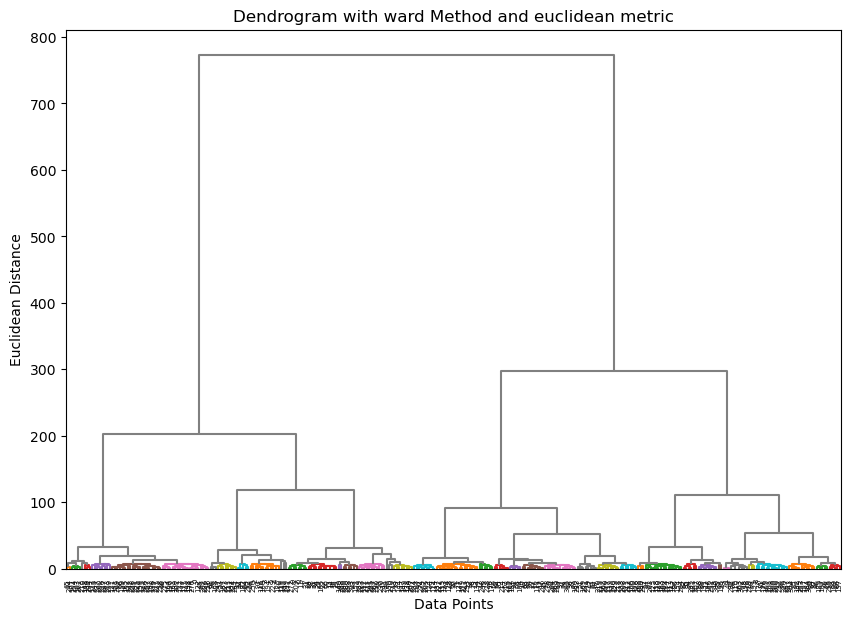

In [203]:
# BEST METHOD
linked = linkage(df_scaled, method=best_linkage, metric=best_metric)

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked, above_threshold_color="grey", color_threshold=7.5)
plt.title(f"Dendrogram with {best_linkage} Method and {best_metric} metric")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

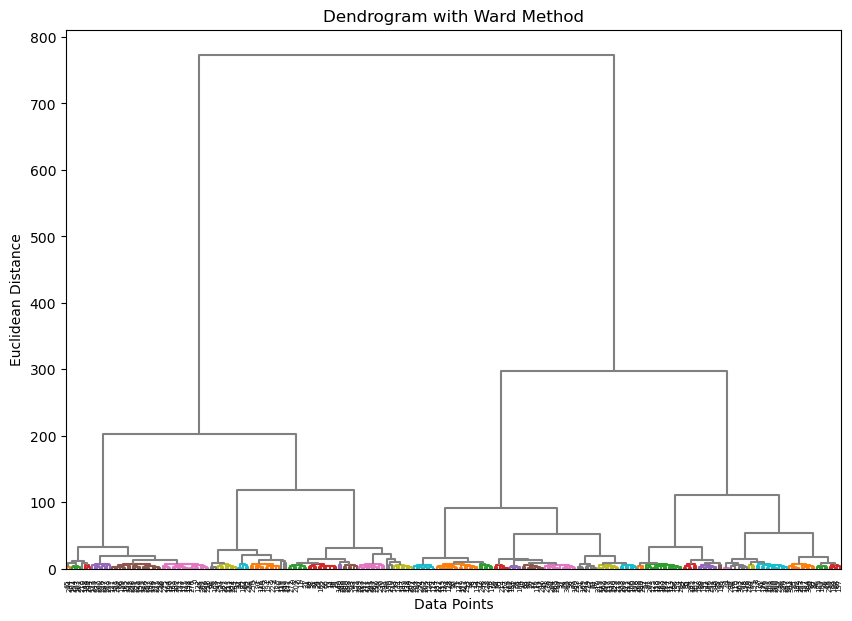

In [204]:
# Ward Method
linked = linkage(df_scaled, method='ward', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked, above_threshold_color="grey", color_threshold=7.5)
plt.title("Dendrogram with Ward Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## Hierarchical Clustering Model

In [205]:
# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df_scaled)

In [206]:
# Evaluation
ss = silhouette_score(df_scaled, y_hc)
print(ss)

0.6432103582061204


## Dendogram Visualization for Hierarchical Clustering Model

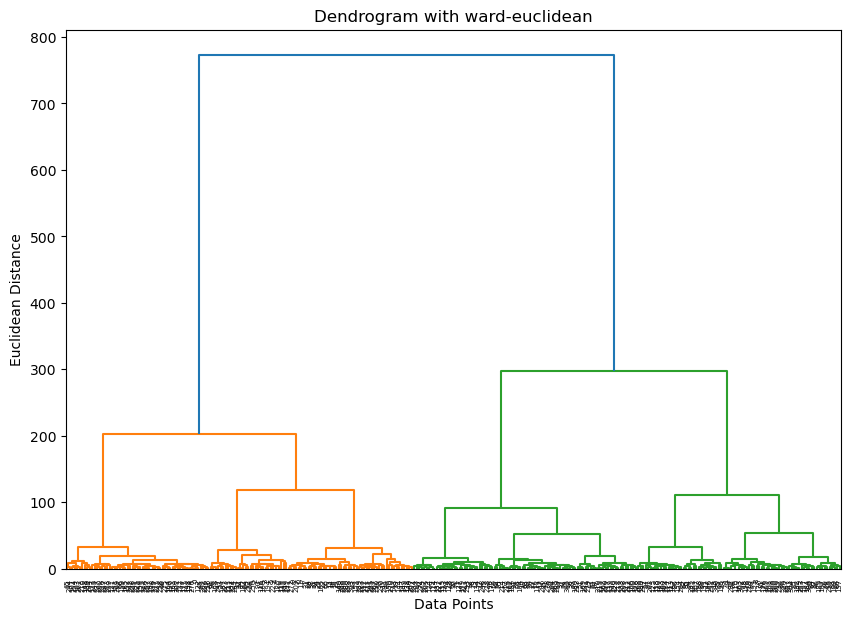

In [207]:
# Average Distance
linked = linkage(df_scaled, method=best_linkage, metric=best_metric)

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + best_linkage + "-" + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## Merge with the original data

In [208]:
# Add the cluster labels to the original data
df['Agglo'] = y_hc

# Analyze the clusters with the original values
df.head()

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah,Agglo
0,3,11,240,300,4,3,2,3500000000,0,3,2,0,1
1,0,96,30,60,2,1,2,287799000,0,3,2,1,0
2,3,47,170,170,5,4,2,2699999999,0,1,0,0,1
3,2,47,187,250,5,5,2,3100000000,0,3,2,0,1
4,1,47,350,600,5,5,2,5000000000,0,0,2,0,1


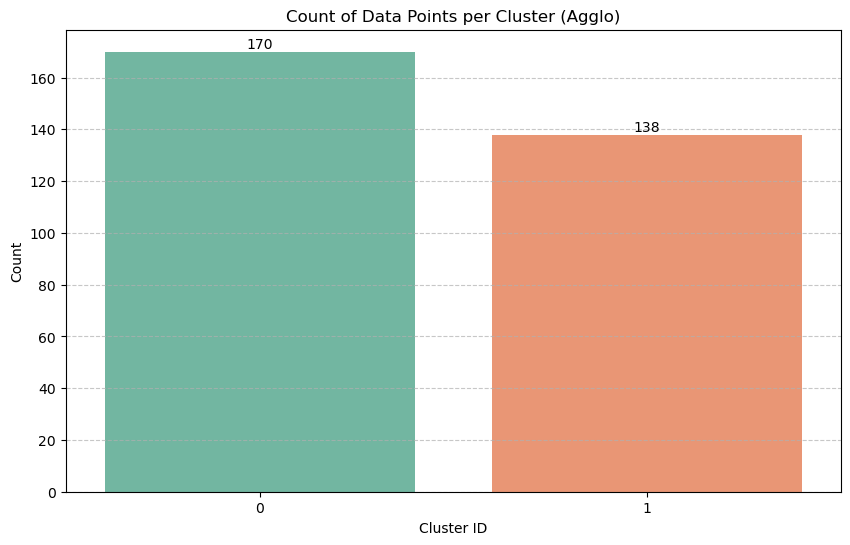

In [209]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Cluster 0 terdapat 170 data
Cluster 1 terdapat 138 data

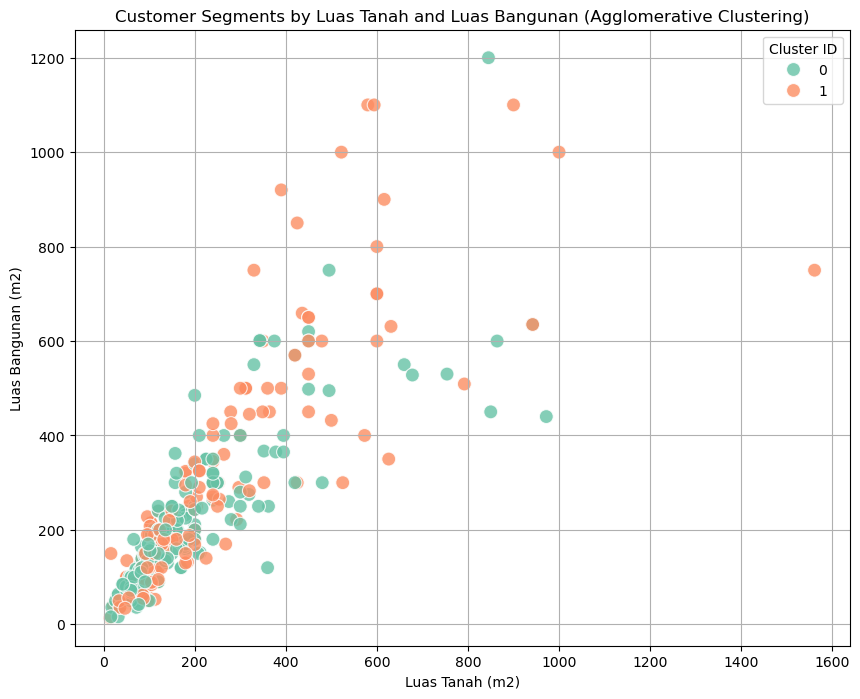

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Luas Tanah', y='Luas Bangunan', hue='Agglo', palette='Set2', s=100, alpha=0.8)
plt.title('Customer Segments by Luas Tanah and Luas Bangunan (Agglomerative Clustering)')
plt.xlabel('Luas Tanah (m2)')
plt.ylabel('Luas Bangunan (m2)')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()

Luas tanah dan Luas bangunan berkolerasi tinggi, karena semakin tinggi luas tanah maka semakin tinggi juga luas bangunan. Namun clustering nya cukup membaur, cluster 0 (hijau) cenderung berada di area luas tanah & bangunan lebih kecil, sebagian besar titik berada di kiri bawah. Sedangkan cluster 1 (orange) menyebar lebih ke kanan atas, menunjukkan properti dengan luas tanah dan bangunan lebih besar.

Ada beberapa titik orange yang tersebar di area hijau — ini kemungkinan properti besar tapi masuk cluster tanah lebih kecil, bisa karena variasi ukuran bangunan vs tanah.

In [211]:
import plotly.express as px

# Define the columns for the 3D scatter plot
x_col = 'Luas Bangunan'
y_col = 'Luas Tanah'
z_col = 'Harga Penawaran'

# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(df,
                    x=x_col,
                    y=y_col,
                    z=z_col,
                    color=df['Agglo'].astype(str), # Color points by Agglo cluster, explicitly as string for discrete colors
                    title='Interactive 3D Scatter Plot of Customers by Agglo Clusters')

fig.show()

Luas tanah vs luas bangunan vs harga penawaran saling berkaitan. Semakin besar luas tanah, maka semakin besar luas bangunan, begitu juga dengan harga penawaran yang semakin tinggi

In [212]:
# BIAR GA KEPOTONG INI
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby(y_hc).agg({
    'Area Category': ['first', 'count'],
    'Nama Daerah': ['first', 'count'],
    'Luas Tanah': ['mean', 'std', 'min', 'max'],
    'Luas Bangunan': ['mean', 'std', 'min', 'max'],
    'Jumlah Kamar': ['mean', 'std', 'min', 'max', 'size'],
    'Jumlah Kamar Mandi': ['mean', 'std', 'min', 'max', 'size'],
    'Tingkat/Lantai ': ['mean', 'std', 'min', 'max', 'size'],
    'Harga Penawaran': ['mean', 'std', 'min', 'max', 'size'],
    'Terjual/Belum': ['first', 'count'],
    'Arah Hadap Rumah': ['first', 'count'],
    'Posisi Rumah': ['first', 'count'],
    'Lebar Jalan Depan Rumah': ['first', 'count'],
})

# Rename the <lambda> column in the Gender MultiIndex level
cluster_summary = cluster_summary.rename(columns={'first': 'mode'}, level=1)
cluster_summary = cluster_summary.rename_axis('cluster')

display(cluster_summary)


Area Category       Nama Daerah        Luas Tanah                  \
                 mode count        mode count        mean         std min   
cluster                                                                     
0                   0   170          96   170  200.452941  176.401876  16   
1                   3   138          11   138  259.594203  225.708928  14   

              Luas Bangunan                       Jumlah Kamar                \
          max          mean         std min   max         mean       std min   
cluster                                                                        
0         972    227.505882  166.985215  16  1200     4.035294  1.483216   1   
1        1561    314.956522  251.339793  14  1100     4.572464  1.783492   1   

                 Jumlah Kamar Mandi                        Tingkat/Lantai   \
        max size               mean       std min max size            mean   
cluster                                                                      
0         9  170           3.076471  1.405833   1   8  170        1.829412   
1        13  138           3.659420  1.818383   1  13  138        1.855072   

                               Harga Penawaran                           \
              std min max size            mean           std        min   
cluster                                                                   
0        0.486826   1   3  170    3.814940e+09  5.020656e+09  160000000   
1        0.534240   1   4  138    6.491776e+09  1.094171e+10  180000000   

                          Terjual/Belum       Arah Hadap Rumah        \
                 max size          mode count             mode count   
cluster                                                                
0        39999990000  170             0   170                3   170   
1        99000000000  138             0   138                3   138   

        Posisi Rumah       Lebar Jalan Depan Rumah        
                mode count                    mode count  
cluster                                                   
0                  2   170                       1   170  
1                  2   138                       0   138

## Cluster 0 (n=170)
Karakteristik utama:
- Mayoritas area berada di kategori Below Standard dan berada di setro baru utara
- Luas tanah dan bangunan tergolong kecil hingga menengah, sekitar 200 m²
- Rata-rata 4 kamar tidur dan 3 kamar mandi, mayoritas rumah 1 lantai.
- Harga penawaran sekitar Rp 3,8 miliar, cukup rendah dibanding cluster 1.
- Semua properti belum terjual, arah hadap rumah dominan Utara, posisi rumah Standard, ddengan lebar jalan kurang dari 1 mobil.

Interpretasi:
Cluster ini merepresentasikan rumah menengah bawah di area setro baru utara dengan spesifikasi dibawah standar. Kemungkinan besar properti di cluster ini kurang menarik minat pembeli. Dengan kondisi seperti ini, developer bisa mempertimbangkan strategi promosi atau penurunan harga untuk mendorong penjualan.

## Cluster 1 (n= 138)
Karakteristik utama:
- Area mayoritas berada di kategori Standard
- Luas tanah dan bangunan lebih besar (259.5 m² tanah dan 314.9 m² bangunan).
- Jumlah kamar tidur & mandi lebih banyak, cocok untuk keluarga besar.
- Harga penawaran rata-rata Rp 6,49 miliar, bisa mencapai Rp 99 miliar (maksimum).
- Sama seperti cluster 0, seluruh properti belum terjual, arah rumah Utara, posisi rumah Standard, lebar jalan 1–2 mobil.

Interpretasi:
Cluster ini berisi properti kelas menengah.
Mereka menawarkan ukuran besar dan fasilitas lengkap, tetapi belum laku — kemungkinan karena harga terlalu tinggi atau berada di area “premium baru” yang belum cukup dikenal.